# OpenScope's Vision to Hippocampus Dataset
 
The goal of this OpenScope project is to parametrize and compare the visual responses across the cortico-hippocampal hierarchy. A large body of work in rodent hippocampus suggests that the hippocampus is involved in spatial encoding, through place cells which encode the location of the animal in world-centric co-ordinate frame. This is in contrast to the studies of visual cortex and other visual areas which are studied in terms of their visual responses to stimuli presented in the retinotopic (or subject centered) frame of reference. Recent work has shown that in the absence of task demands, locomotion and reward contingencies, the hippocampal region CA1 responds like a sensory cortex, responding to the positions of a bar of light (Purandare et al, 2022). 

The current project extends that work to the entire hierarchy of hippocampal regions (the well-studied perforant pathway – DG-CA3-CA1) as well as output and input regions of this pathway (Subiculum and entorhinal cortex). Owing to the high-density recordings made possible with Neuropixel probes, we also got simultaneous recordings from many other interesting areas, for example, retrosplenial cortex, cingulate cortex, superior colliculus as well as some other frontal motor areas. 

### Stimuli presented**

There were 2 main classes of visual stimuli used
1.	Simple visual motion, elicited by basic stimuli, like bars of light.
2.	Complex, potentially ethologically valid visual stimuli, elicited by movies involving eagles (and squirrels).
Among each class, the following variants were used –

**Simple bars of light**

-	Vertical bar, moving left right (naso-temporal)
-	Horizontal bar, moving up and down.
-	A ring of light, expanding and contracting
-	Similar to the ring, a disk
-	A bar rotating CW and CCW like the hands of a clock. 

To further characterize the stimulus properties which might be affecting neural responses, we performed variants of the vertical bar of light as follows:
A(o) – The bar of light was white, moving on a black background, 15 degrees wide, and moved at a fixed speed, covered the entire width of the screen in 2 seconds. It covered both movement directions consecutively (naso-temporal, then temporo-nasal).
A(i) – Similar to A(o), but the bar was now thrice as wide (45o)
A(ii) – Similar to A(o), but the bar was thrice as slow (covering the width of the screen in 6 seconds).
A(iii) – Similar to A(o), but the contrast was flipped, i.e. a black bar of light on a white background.
A(iv) - Similar to A(o), but instead of a simple white bar, the stimulus was striped, and each stripe changed color as the stimulus moved through the width of the screen. This was called “disco” bar of light
A(v) – Similar to A(o), but the temporal order of the frames was scrambled, such that the frames were effectively “flashed” with the bar of light at different locations.
A(vi) – Similar to A(o), but instead of a bar of light, there was a pixel-equivalent coherent dot motion. These dots moved naso-temporally for 2 seconds and then moved in the other direction for the next 2 seconds.
A(vii) – In a subset of mice, A(o) was appended by frames corresponding to the bar of light “vanishing” at either of the edges. Two vanishing protocols were attempted, the bar of light is fully absorbed by the boundary, before reemerging. Another protocol had the bar of light vanish for ~1 second in addition to smoothly being absorbed by the boundary, before reemerging. 
 
![vippo_fig2.png](../../data/images/vippo_fig2.png)


**Complex visual stimuli**
A 20 second clip of an eagle swooping down was used as the central “natural movie”, which was shown to all mice in the dataset. In 5 mice, another “natural movie” involving squirrels was used along with the eagle movie. In 12 of the remaining mice, we used variants of the eagle movie as follows 
Natural (o) – 20 second clip of an eagle swooping down and capturing a fish from a lake.
Natural (i) – Same clip as Natural (o), but alternate frame was presented, effectively creating a sped up, 10 second clip. 
Natural (ii) – Flipped movie, where each frame of the original movie was flipped (either top-down or left right flips). 
Natural (iii) – The original eagle movie was shown, but with patches of black, to create occlusion. 
 
![vippo_fig3.png](../../data/images/vippo_fig3.png)

### Environment Setup
⚠️**Note: If running on a new environment, run this cell once and then restart the kernel**⚠️

In [39]:
import warnings
warnings.filterwarnings('ignore')

try:
    from databook_utils.dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .
    %cd docs/projects

In [40]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from math import floor, ceil, isclose
from PIL import Image

### The Experiment
As shown in the metadata table below, Openscope's Vippo Experiment has produced TODO main files on the [DANDI Archive](http://dandiarchive.org), This table was generated from [Getting Experimental Metadata from DANDI](../basics/get_dandiset_metadata.ipynb).

In [41]:
session_files = pd.read_csv("../../data/glo_sessions.csv")
session_files

,identifier,size,path,session_time,specimen_name,sex,age,genotype,probes,stim_types,n_units,session_end
0,89fa5067-31a8-4f2d-a043-5721120501a0,2499178105,sub-621890/sub-621890_ses-1186358749_ogen.nwb,2022-06-22 00:00:00-07:00,621890,F,128,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeF', 'probeA', 'probeB', 'probeD', 'prob...","{'init_grating_presentations', 'create_recepti...",2446,6713.70871
1,463e9cae-ff12-4e54-8b8f-e9293480f762,982474234,sub-621891/sub-621891_ses-1179909741_ogen.nwb,2022-05-25 00:00:00-07:00,621891,F,100,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'OptogeneticStimulusDevice', 'probe...","{'init_grating_presentations', 'create_recepti...",1118,6713.54730
2,38e79b1b-e2a6-4f5c-ae62-5538d295b827,2341394409,sub-632487/sub-632487_ses-1204677304_ogen.nwb,2022-09-01 00:00:00-07:00,632487,F,122,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeF', 'probeA', 'probeB', 'probeD', 'prob...","{'init_grating_presentations', 'create_recepti...",2745,6948.51640
3,2b44dc78-2c9f-4a71-95ed-360df2b70d61,2180444622,sub-637542/sub-637542_ses-1211241460_ogen.nwb,2022-09-15 00:00:00-07:00,637542,F,98,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeF', 'probeA', 'probeB', 'probeD', 'prob...","{'init_grating_presentations', 'create_recepti...",2055,7012.67225
4,b305ccec-fa84-445e-aea5-0126d6eff558,2456101222,sub-632485/sub-632485_ses-1203581890_ogen.nwb,2022-08-31 00:00:00-07:00,632485,F,121,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeF', 'probeA', 'probeB', 'probeD', 'prob...","{'init_grating_presentations', 'create_recepti...",2272,6953.67750
5,7bf17d6e-1ee6-49da-b7fe-836f0f4cd5ff,2296804544,sub-637909/sub-637909_ses-1212569512_ogen.nwb,2022-09-20 00:00:00-07:00,637909,M,101,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeF', 'probeA', 'probeB', 'probeD', 'prob...","{'init_grating_presentations', 'create_recepti...",2414,7054.55339
6,6e4a0d70-3977-4053-8c03-f72b8fe6d451,2281456759,sub-637908/sub-637908_ses-1213341633_ogen.nwb,2022-09-22 00:00:00-07:00,637908,M,103,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeF', 'probeA', 'probeB', 'probeD', 'prob...","{'init_grating_presentations', 'create_recepti...",2558,7281.38293
7,be571a44-3250-4f6c-853c-33b50c1e6f6e,2262651792,sub-640507/sub-640507_ses-1217213788_ogen.nwb,2022-10-12 00:00:00-07:00,640507,F,104,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeF', 'probeA', 'probeB', 'probeD', 'prob...","{'init_grating_presentations', 'create_recepti...",2378,6956.49722
8,e2a7c38c-837d-42e1-8b2d-18f464dc9af6,2153492016,sub-647836/sub-647836_ses-1227858756_ogen.nwb,2022-11-22 00:00:00-08:00,647836,F,88,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeF', 'probeA', 'probeB', 'probeD', 'prob...","{'init_grating_presentations', 'create_recepti...",2170,6926.58617
9,f0aaa669-81ba-40e9-bd3e-4a05ad6018ad,2857396605,sub-645324/sub-645324_ses-1226788689_ogen.nwb,2022-11-17 00:00:00-08:00,645324,M,104,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeF', 'probeA', 'probeB', 'probeD', 'prob...","{'init_grating_presentations', 'create_recepti...",3101,6926.62368


In [42]:
m_count = len(session_files["sex"][session_files["sex"] == "M"])
f_count = len(session_files["sex"][session_files["sex"] == "F"])
sst_count = len(session_files[session_files["genotype"].str.count("Sst") >= 1])
pval_count = len(session_files[session_files["genotype"].str.count("Pval") >= 1])
wt_count = len(session_files[session_files["genotype"].str.count("wt/wt") >= 1])

print("Dandiset Overview:")
print(len(session_files), "files")
print(len(set(session_files["specimen_name"])), "subjects", m_count, "males,", f_count, "females")
print(sst_count, "sst,", pval_count, "pval,", wt_count, "wt")

Dandiset Overview:
14 files
14 subjects 4 males, 10 females
8 sst, 6 pval, 0 wt


### Downloading Ecephys File

In [43]:
dandiset_id = "000690"
dandi_filepath = "sub-692072/sub-692072_ses-1298465622.nwb"
download_loc = "."
dandi_api_key = os.environ["DANDI_API_KEY"]

In [44]:
# This can sometimes take a while depending on the size of the file
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
nwb = io.read()

File already exists
Opening file


### Showing Probe Tracks
The images below were rendered using the [Visualizing Neuropixels Probe Locations](../visualization/visualize_neuropixels_probes.ipynb) notebook. The probes are using the [Common Coordinate Framework](https://community.brain-map.org/t/allen-mouse-ccf-accessing-and-using-related-data-and-tools/359) (CCF). The experiment uses six probes labeled A-F to target various regions.

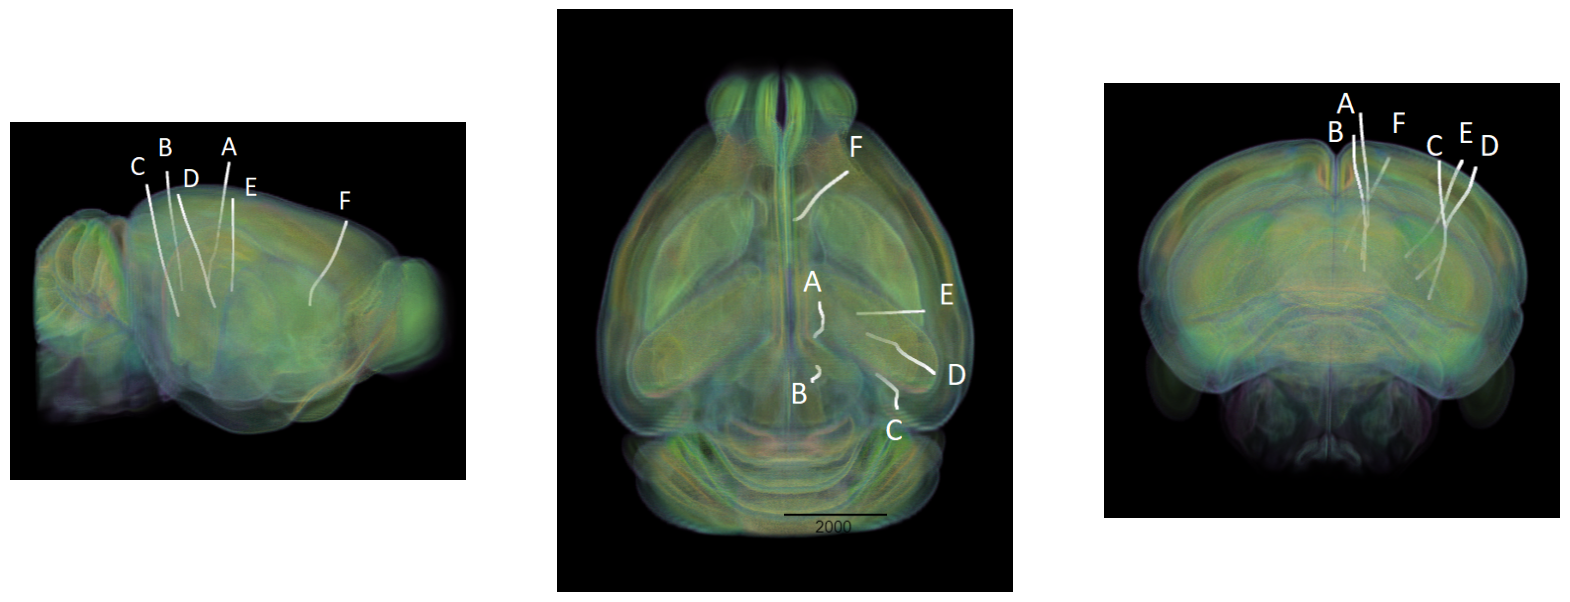

In [45]:
sagittal_view = Image.open("../../data/images/vippo_probes_sagittal.png")
dorsal_view = Image.open("../../data/images/vippo_probes_dorsal.png")
transverse_view = Image.open("../../data/images/vippo_probes_transverse.png")
fig, axes = plt.subplots(1,3,figsize=(20,60))

axes[0].imshow(sagittal_view)
axes[1].imshow(dorsal_view)
axes[2].imshow(transverse_view)
for ax in axes:
    ax.axis("off")

### Extracting Units Spikes
Below, the `Units` table is retrieved from the file. It contains many metrics for every putative neuronal unit, printed below. For the analysis in this notebook, we are only interested in the `spike_times` attribute. This is an array of timestamps that a spike is measured for each unit. For more information on the various unit metrics, see [Visualizing Unit Quality Metrics](../visualization/visualize_unit_metrics.ipynb). From this table, the Units used in this notebook are selected if they have 'good' quality rather than 'noise', and if they belong in one of the regions of the primary visual cortex.

In [46]:
units = nwb.units
units[:10]

,recovery_slope,l_ratio,d_prime,max_drift,firing_rate,isi_violations,presence_ratio,spread,velocity_above,repolarization_slope,...,PT_ratio,snr,nn_hit_rate,cumulative_drift,amplitude_cutoff,silhouette_score,local_index,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,
12,-0.140852,0.000057,6.233920,31.97,1.992914,1.224279,0.99,50.0,-0.343384,0.576991,...,0.596259,2.713103,0.995333,728.41,0.498130,-1.000000,0,"[22.76992282041222, 22.783856106625358, 22.812...","[0.00017990238915862748, 0.0001158438415850443...","[[0.0, 0.3712799999999996, 0.2856749999999997,..."
13,-0.120064,0.000212,6.380643,33.91,1.516987,0.100634,0.99,30.0,-0.343384,0.818315,...,0.350053,4.435071,0.992157,452.22,0.005924,0.187985,1,"[22.86008918215036, 22.966555488764637, 35.524...","[0.0002144826054165842, 0.0002642146285980156,...","[[0.0, -0.43894499999999814, -0.71662499999999..."
14,-0.061008,0.001185,4.884140,56.95,0.703265,2.528098,0.99,40.0,0.206030,0.241781,...,0.707848,2.236984,0.929936,658.63,0.500000,0.151979,2,"[22.71692299964932, 22.775156136047297, 33.697...","[0.00019346088549011372, 0.0001325490015848021...","[[0.0, -0.30556500000000075, -0.73787999999999..."
15,-0.149691,0.002038,5.300020,6.65,0.047692,20.360357,0.89,30.0,0.343384,0.620252,...,0.635339,2.293410,0.370370,0.00,0.160257,-1.000000,3,"[33.70428584210749, 131.43085534614167, 558.25...","[0.00012903155020274154, 0.0001204155056725696...","[[0.0, 0.14145077720207022, 0.8673963730569932..."
16,-0.060737,0.001665,3.732261,39.00,0.766648,0.078791,0.99,30.0,-4.807370,0.416142,...,0.722337,2.292777,0.961187,804.07,0.006804,0.098607,4,"[33.670485956413415, 35.54281295782981, 36.159...","[0.00012879827888614498, 0.0001422417048717127...","[[0.0, -0.3408599999999984, -0.251549999999999..."
17,-0.049657,0.000373,4.709497,29.89,1.727398,0.046559,0.99,30.0,0.000000,0.868783,...,0.260276,3.844790,0.991696,368.11,0.004070,0.265589,5,"[20.942295667827928, 22.715523004383883, 22.71...","[0.00017015089162517638, 0.0001707744923264808...","[[0.0, -1.160835000000001, -0.6550050000000008..."
18,-0.043094,0.020139,3.875737,74.63,28.778887,0.054798,0.99,70.0,-0.206030,0.565132,...,0.235380,2.835290,0.904667,374.82,0.031949,0.235098,6,"[21.40562743424573, 22.70858969449792, 22.7189...","[0.00027740872559489914, 0.0001854297104938351...","[[0.0, -0.32175000000000087, -0.57954000000000..."
19,-0.142276,0.013372,4.586741,16.11,0.192743,0.000000,0.23,50.0,0.343384,0.789448,...,0.423055,3.698435,0.154762,39.25,0.021344,-1.000000,7,"[614.5419882065542, 1230.2982391486003, 1247.0...","[0.0002817193886807515, 0.00034835102540897326...","[[0.0, -1.4075100000000011, -1.464840000000001..."
20,-0.088705,0.024535,3.589084,83.15,3.554133,0.021996,0.93,50.0,0.343384,0.558968,...,0.687279,1.877844,0.836000,395.03,0.005054,0.181590,8,"[291.4390142235864, 291.4497141874008, 291.688...","[0.00021363707722923971, 0.0001794111687378251...","[[0.0, 0.9748050000000008, 2.442375, 2.3462400..."


In [47]:
# select electrodes
channel_probes = {}

electrodes = nwb.electrodes
for i in range(len(electrodes)):
    channel_id = electrodes["id"][i]
    location = electrodes["location"][i]
    channel_probes[channel_id] = location

# function aligns location information from electrodes table with channel id from the units table
def get_unit_location(row):
    return channel_probes[int(row.peak_channel_id)]

print(set(get_unit_location(row) for row in units))

{'VISli2/3', 'RSPagl1', 'CP', 'DG-sg', 'SSp-bfd6a', 'RSPagl5', 'LP', 'PF', 'DG-mo', 'RSPagl2/3', 'VISa6b', 'MOp6b', 'SUB', 'DG-po', 'VISli6b', 'VISli1', 'VISli4', 'VISli6a', 'HPF', 'VPL', 'VISli5', 'MOp2/3', 'RSPagl6a', 'VPM', 'SSp-bfd5', 'MOp6a', 'RT', 'TH', 'MOp5', 'VISa6a', 'SSp-bfd4', 'CA1', 'root', 'SSp-bfd2/3'}


In [48]:
### selecting units spike times

# brain_regions = ["VISp6a", "VISp5", "VISp4", "VISp6b", "VISp2/3"]
brain_regions = ["VISa6a","VISli6a","VISli4","VISli1","VISli6b","VISli2/3"]

# select units based if they have 'good' quality and exists in one of the specified brain_regions
units_spike_times = []
for location in brain_regions:
    location_units_spike_times = []
    for row in units:
        if get_unit_location(row) == location and row.quality.item() == "good":
            location_units_spike_times.append(row.spike_times.item())
    units_spike_times += location_units_spike_times

print(len(units_spike_times))

193


### Session Timeline
To get a good idea of the order and the way stimulus is shown throughout the session, the code below generates a timeline of the various 'epochs' of stimulus. It can be seen that there are many repeated epochs of the gratings presentation, interspersed with intermission presentations, followed by an epoch of receptive field presentations. Note that there is an overlap of two epochs, the final gratings and the receptive field mapping presentations. This is due to a unintended stim design mistake, please **be careful** when analyzing data from this period.

In [49]:
# extract epoch times from stim table where stimulus rows have a different 'block' than following row
# returns list of epochs, where an epoch is of the form (stimulus name, stimulus block, start time, stop time)
def extract_epochs(stim_name, stim_table, epochs):
    
    # specify a current epoch stop and start time
    epoch_start = stim_table.start_time[0]
    epoch_stop = stim_table.stop_time[0]

    # for each row, try to extend current epoch stop_time
    for i in range(len(stim_table)):
        this_block = stim_table.stimulus_block[i]
        # if end of table, end the current epoch
        if i+1 >= len(stim_table):
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            break
            
        next_block = stim_table.stimulus_block[i+1]
        # if next row is the same stim block, push back epoch_stop time
        if next_block == this_block:
            epoch_stop = stim_table.stop_time[i+1]
        # otherwise, end the current epoch, start new epoch
        else:
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            epoch_start = stim_table.start_time[i+1]
            epoch_stop = stim_table.stop_time[i+1]
    
    return epochs

In [50]:
# extract epochs from all valid stimulus tables
epochs = []
for stim_name in nwb.intervals.keys():
    stim_table = nwb.intervals[stim_name]
    try:
        epochs = extract_epochs(stim_name, stim_table, epochs)
    except:
        continue

# # manually add optotagging epoch since the table is stored separately
# opto_stim_table = nwb.processing["optotagging"]["optogenetic_stimulation"]
# opto_epoch = ("optogenetic_stimulation", 1.0, opto_stim_table.start_time[0], opto_stim_table.stop_time[-1])
# epochs.append(opto_epoch)

# epochs take the form (stimulus name, stimulus block, start time, stop time)
print(len(epochs))
epochs.sort(key=lambda x: x[2])
for epoch in epochs:
    print(epoch)

21
('SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 0.0, 113.10293015389608, 593.538290153896)
('SAC_Wd15_Vel2_Bndry2_Cntst0_loop_presentations', 1.0, 593.538290153896, 877.776270153896)
('SAC_Wd15_Vel2_Bndry3_Cntst0_loop_presentations', 2.0, 877.776270153896, 1250.0879201538962)
('SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations', 3.0, 1250.0879201538962, 2210.909000153896)
('SAC_Wd45_Vel2_Bndry1_Cntst0_loop_presentations', 4.0, 2210.909000153896, 2451.110230153896)
('SAC_Wd15_Vel2_Bndry1_Cntst1_loop_presentations', 5.0, 2451.110230153896, 2691.311240153896)
('SAC_Wd15_Vel2_Bndry2_Cntst0_oneway_presentations', 6.0, 2691.311240153896, 2833.430250153896)
('UD_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 7.0, 2833.430250153896, 3313.832440153896)
('Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 8.0, 3313.832440153896, 3794.234680153896)
('Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 9.0, 3794.234680153896, 4034.435770153896)
('curl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations', 1

In [51]:
time_start = floor(min([epoch[2] for epoch in epochs]))
time_end = ceil(max([epoch[3] for epoch in epochs]))
all_units_spike_times = np.concatenate(units_spike_times).ravel()
print(time_start, time_end)

# make histogram of unit spikes per second over specified timeframe
time_bin_edges = np.linspace(time_start, time_end, (time_end-time_start))
hist, bins = np.histogram(all_units_spike_times, bins=time_bin_edges)

113 7158


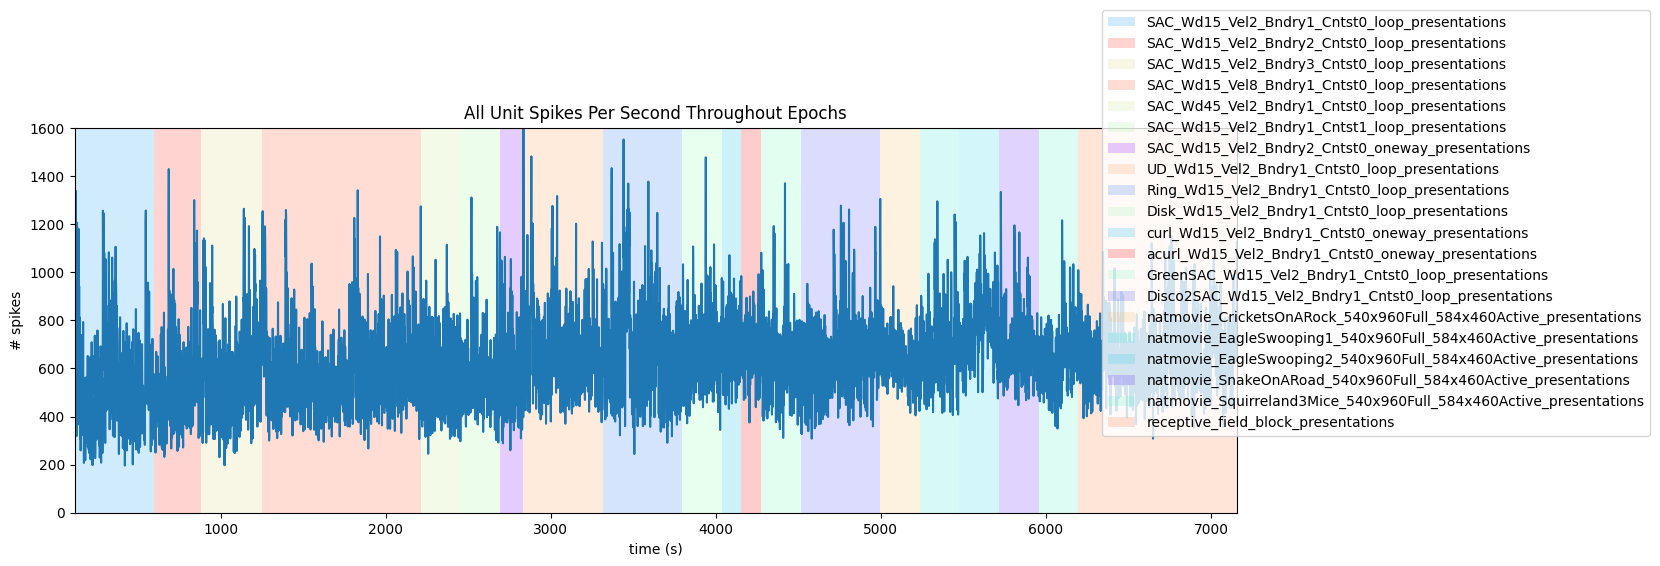

In [52]:
# generate plot of spike histogram with colored epoch intervals and legend
fig, ax = plt.subplots(figsize=(15,5))

# assign unique color to each stimulus name
stim_names = list({epoch[0] for epoch in epochs})
colors = plt.cm.rainbow(np.linspace(0,1,len(stim_names)))
stim_color_map = {stim_names[i]:colors[i] for i in range(len(stim_names))}

epoch_key = {}
height = max(hist)
# draw colored rectangles for each epoch
for epoch in epochs:
    stim_name, stim_block, epoch_start, epoch_end = epoch
    color = stim_color_map[stim_name]
    rec = ax.add_patch(mpl.patches.Rectangle((epoch_start, 0), epoch_end-epoch_start, height, alpha=0.2, facecolor=color))
    epoch_key[stim_name] = rec

ax.set_xlim(time_start, time_end)
ax.set_ylim(-0.1, height+0.1)
ax.set_xlabel("time (s)")
ax.set_ylabel("# spikes")
ax.set_title("All Unit Spikes Per Second Throughout Epochs")

fig.legend(epoch_key.values(), epoch_key.keys(), loc="lower right", bbox_to_anchor=(1.18, 0.25))
ax.plot(bins[:-1], hist)

### Extracting Stimulus Times

In [53]:
nwb.intervals.keys()

dict_keys(['Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'SAC_Wd15_Vel2_Bndry1_Cntst1_loop_presentations', 'SAC_Wd15_Vel2_Bndry2_Cntst0_loop_presentations', 'SAC_Wd15_Vel2_Bndry2_Cntst0_oneway_presentations', 'SAC_Wd15_Vel2_Bndry3_Cntst0_loop_presentations', 'SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations', 'SAC_Wd45_Vel2_Bndry1_Cntst0_loop_presentations', 'UD_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'acurl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations', 'curl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations', 'invalid_times', 'natmovie_CricketsOnARock_540x960Full_584x460Active_presentations', 'natmovie_EagleSwooping1_540x960Full_584x460Active_presentations', 'natmovie_EagleSwooping2_540x960Full_584x460Active_presentations', 'natmovie_SnakeOnARoad_540x960Full_584x460Active_

In [54]:
stim_table = nwb.intervals["Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations"]
print(np.mean(np.diff(stim_table.start_time)))
print({elem for elem in stim_table.frame if not np.isnan(elem)})

0.016680631960898976
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155

In [55]:
stim_table[:10]

,start_time,stop_time,stimulus_name,stimulus_block,frame,color,contrast,opacity,orientation,size,units,stimulus_index,tags,timeseries
id,,,,,,,,,,,,,,
0,4514.837970,4514.854651,Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop,13.0,0.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(263880, 1, timestamps pynwb.base.TimeSeries ..."
1,4514.854651,4514.871333,Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop,13.0,1.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(263881, 1, timestamps pynwb.base.TimeSeries ..."
2,4514.871333,4514.888014,Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop,13.0,2.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(263882, 1, timestamps pynwb.base.TimeSeries ..."
3,4514.888014,4514.904696,Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop,13.0,3.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(263883, 1, timestamps pynwb.base.TimeSeries ..."
4,4514.904696,4514.921377,Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop,13.0,4.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(263884, 1, timestamps pynwb.base.TimeSeries ..."
5,4514.921377,4514.938058,Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop,13.0,5.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(263885, 1, timestamps pynwb.base.TimeSeries ..."
6,4514.938058,4514.954740,Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop,13.0,6.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(263886, 1, timestamps pynwb.base.TimeSeries ..."
7,4514.954740,4514.971421,Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop,13.0,7.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(263887, 1, timestamps pynwb.base.TimeSeries ..."
8,4514.971421,4514.988102,Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop,13.0,8.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(263888, 1, timestamps pynwb.base.TimeSeries ..."


In [56]:
# select times where there is a local oddball
stim_select = lambda row: row.frame.item() == 0.0
stim_times = [row.start_time.item() for row in stim_table if stim_select(row)]
print(len(stim_times))

120


### Generating Spike Matrix

In [57]:
# bin size for counting spikes
time_resolution = 0.005

# start and end times (relative to the stimulus at 0 seconds) that we want to examine and align spikes to
window_start_time = -0.25
window_end_time = 0.5

In [58]:
def get_spike_matrix(stim_times, units_spike_times, bin_edges):
    time_resolution = np.mean(np.diff(bin_edges))
    # 3D spike matrix to be populated with spike counts
    spike_matrix = np.zeros((len(units_spike_times), len(stim_times), len(bin_edges)-1))

    # populate 3D spike matrix for each unit for each stimulus trial by counting spikes into bins
    for unit_idx in range(len(units_spike_times)):
        spike_times = units_spike_times[unit_idx]

        for stim_idx, stim_time in enumerate(stim_times):
            # get spike times that fall within the bin's time range relative to the stim time        
            first_bin_time = stim_time + bin_edges[0]
            last_bin_time = stim_time + bin_edges[-1]
            first_spike_in_range, last_spike_in_range = np.searchsorted(spike_times, [first_bin_time, last_bin_time])
            spike_times_in_range = spike_times[first_spike_in_range:last_spike_in_range]

            # convert spike times into relative time bin indices
            bin_indices = ((spike_times_in_range - (first_bin_time)) / time_resolution).astype(int)
            
            # mark that there is a spike at these bin times for this unit on this stim trial
            for bin_idx in bin_indices:
                spike_matrix[unit_idx, stim_idx, bin_idx] += 1

    return spike_matrix

In [59]:
# time bins used
n_bins = int((window_end_time - window_start_time) / time_resolution)
bin_edges = np.linspace(window_start_time, window_end_time, n_bins, endpoint=True)

# calculate baseline and stimulus interval indices for use later
stimulus_onset_idx = int(-bin_edges[0] / time_resolution)

spike_matrix = get_spike_matrix(stim_times, units_spike_times, bin_edges)

print(spike_matrix.shape)

(193, 120, 149)


### Showing Response Windows
After generating spike matrices, we can view the PSTHs for each unit.

In [60]:
def show_response(ax, window, window_start_time, window_end_time, aspect="auto", vmin=None, vmax=None, yticklabels=[], skipticks=1, xlabel="Time (s)", ylabel="ROI", cbar=True, cbar_label=None):
    if len(window) == 0:
        print("Input data has length 0; Nothing to display")
        return

    img = ax.imshow(window, aspect=aspect, extent=[window_start_time, window_end_time, 0, len(window)], interpolation="none", vmin=vmin, vmax=vmax)
    if cbar:
        ax.colorbar(img, shrink=0.5, label=cbar_label)

    ax.plot([0,0],[0, len(window)], ":", color="white", linewidth=1.0)

    if len(yticklabels) != 0:
        ax.set_yticks(range(len(yticklabels)))
        ax.set_yticklabels(yticklabels, fontsize=8)

        n_ticks = len(yticklabels[::skipticks])
        ax.yaxis.set_major_locator(plt.MaxNLocator(n_ticks))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [61]:
def show_many_responses(windows, rows, cols, window_idxs=None, title=None, subplot_title="", xlabel=None, ylabel=None, cbar_label=None, vmin=0, vmax=2):
    if window_idxs is None:
        window_idxs = range(len(windows))
    windows = windows[window_idxs]
    
    # handle case with no input data
    if len(windows) == 0:
        print("Input data has length 0; Nothing to display")
        return
    # handle cases when there aren't enough windows for number of rows
    if len(windows) < rows*cols:
        rows = (len(windows) // cols) + 1

    fig, axes = plt.subplots(rows, cols, figsize=(2*cols, 3*rows), layout="constrained")
    # handle case when there's only one row
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))

    for i in range(rows*cols):
        ax_row = int(i // cols)
        ax_col = i % cols
        ax = axes[ax_row][ax_col]
        
        if i > len(windows)-1:
            ax.set_visible(False)
            continue

        window = windows[i]
        show_response(ax, window, window_start_time, window_end_time, xlabel=xlabel, ylabel=ylabel, cbar=False, vmin=vmin, vmax=vmax)
        ax.set_title(f"{subplot_title} {window_idxs[i]}")
        if ax_row != rows-1:
            ax.get_xaxis().set_visible(False)
        if ax_col != 0:
            ax.get_yaxis().set_visible(False)

    fig.suptitle(title)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    colorbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=axes, shrink=2/cols, label=cbar_label)


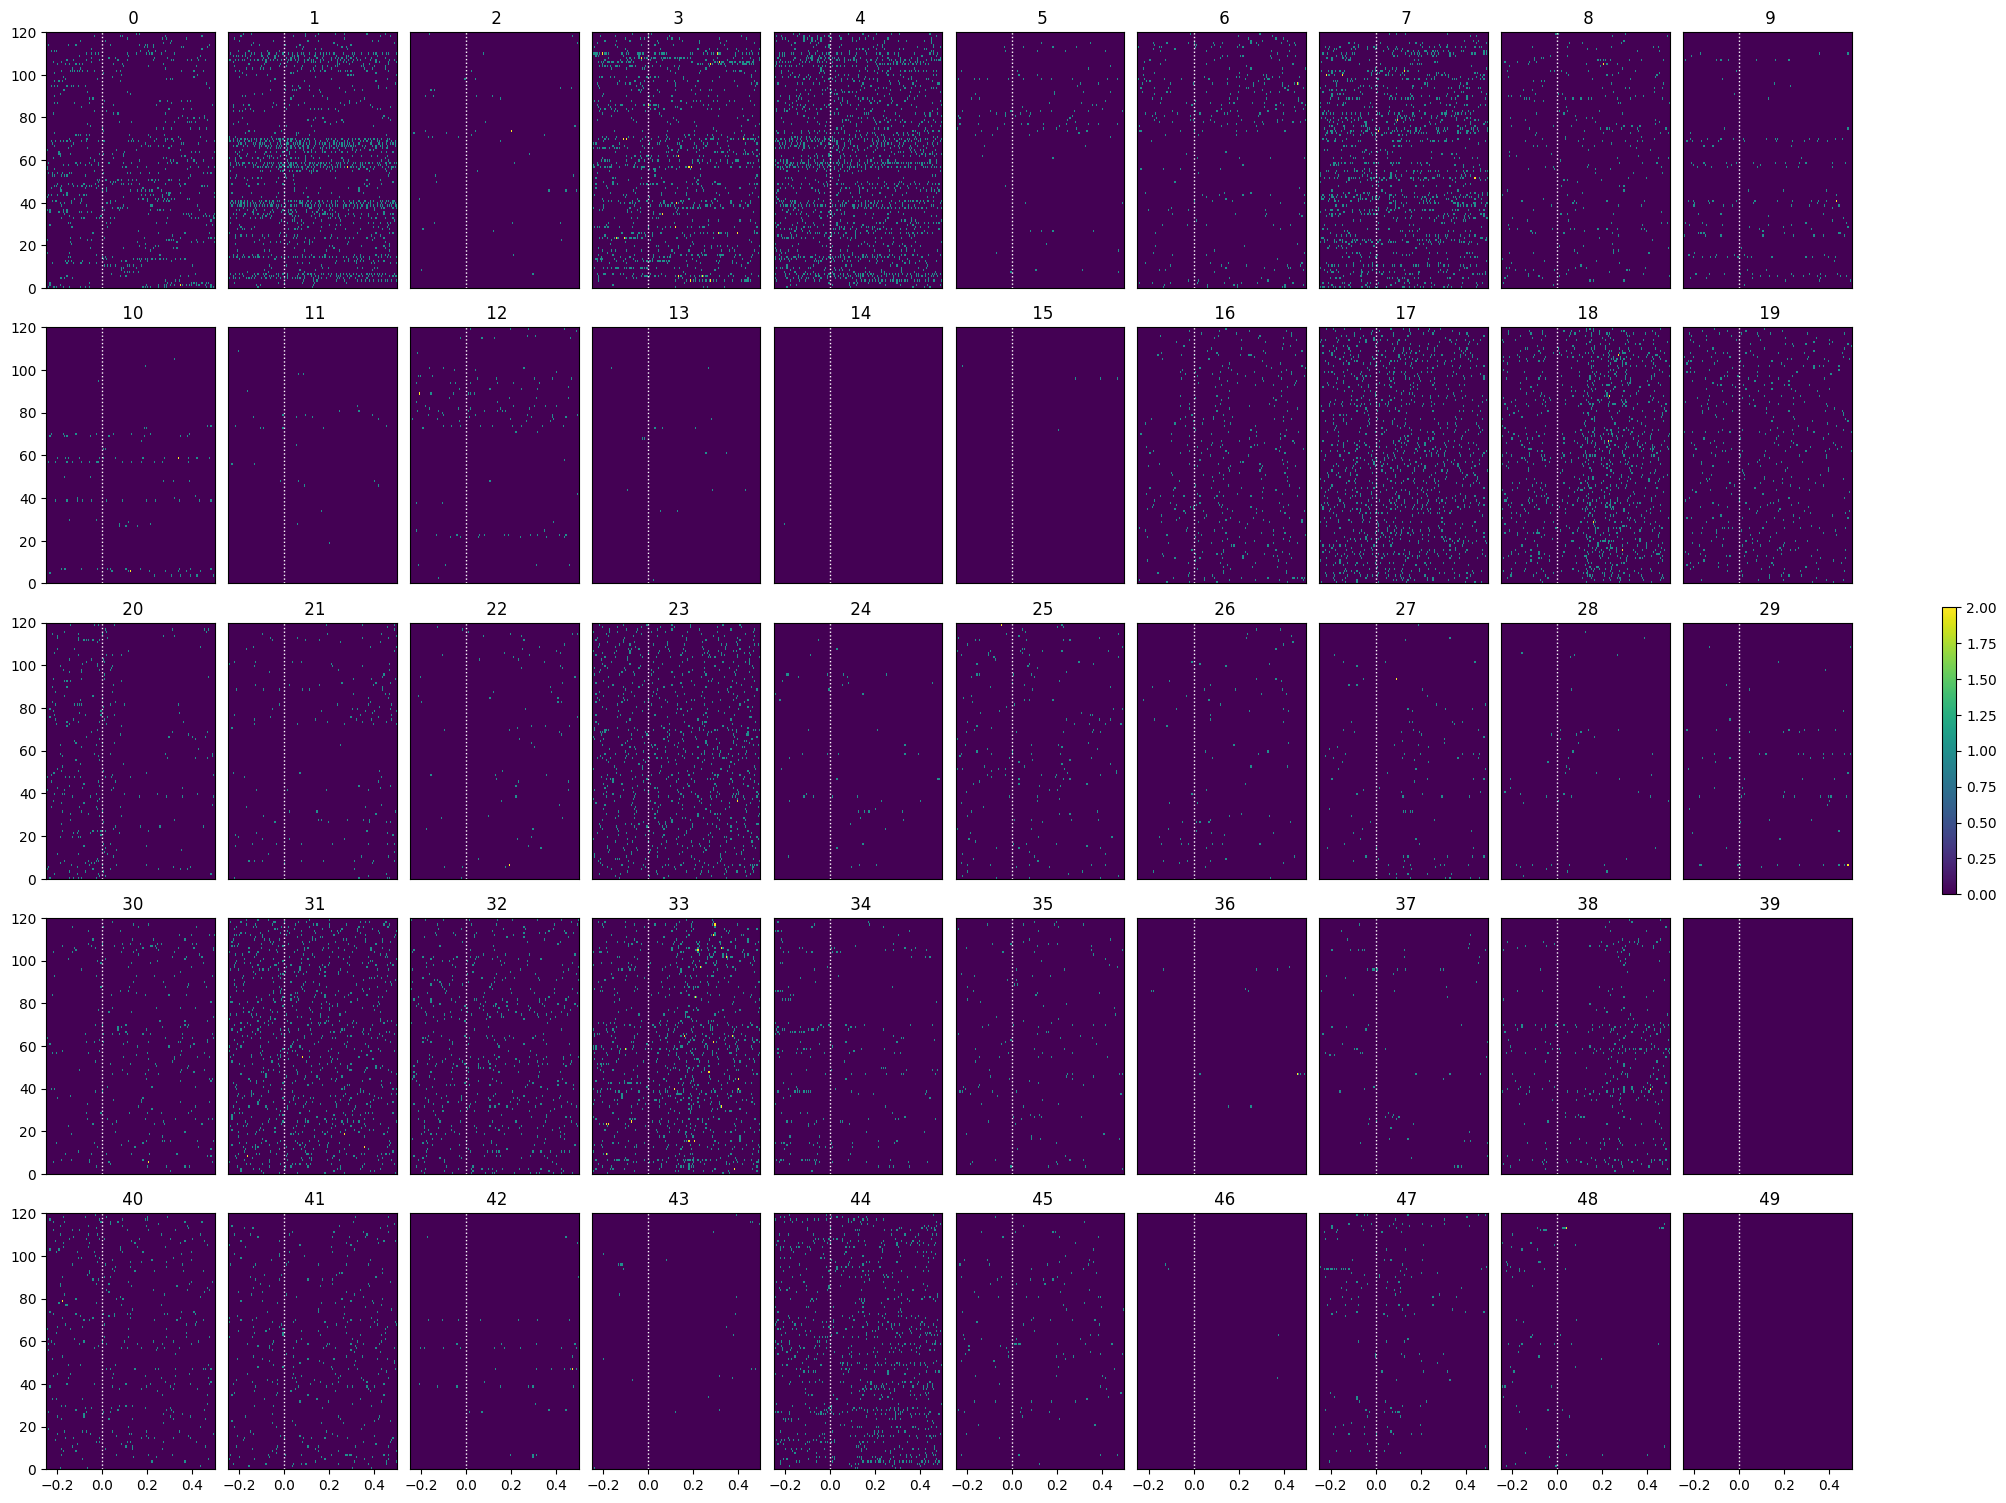

In [62]:
show_many_responses(spike_matrix, 5, 10)

### Selecting Responsive Cells
As discussed in [Statistically Testing 2P Responses to Stimulus](../first-order/test_2p_responses.ipynb), the criteria used to select for responsive cells can have a significant impact. Here, the simple criterion is to select units whose post-stimulus z-scores are greater than 1 or less than -1.

In [63]:
def select_cells(spike_matrix, stimulus_onset_idx):
    baseline_means = np.mean(spike_matrix[:,:,:stimulus_onset_idx], axis=2)
    mean_baseline_means = np.mean(baseline_means, axis=1)
    std_baseline_means = np.std(baseline_means, axis=1)

    response_means = np.mean(spike_matrix[:,:,stimulus_onset_idx:], axis=2)
    mean_response_means = np.mean(response_means, axis=1)

    unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means
    return np.where(np.logical_or(unit_z_scores > 1, unit_z_scores < -1))[0]

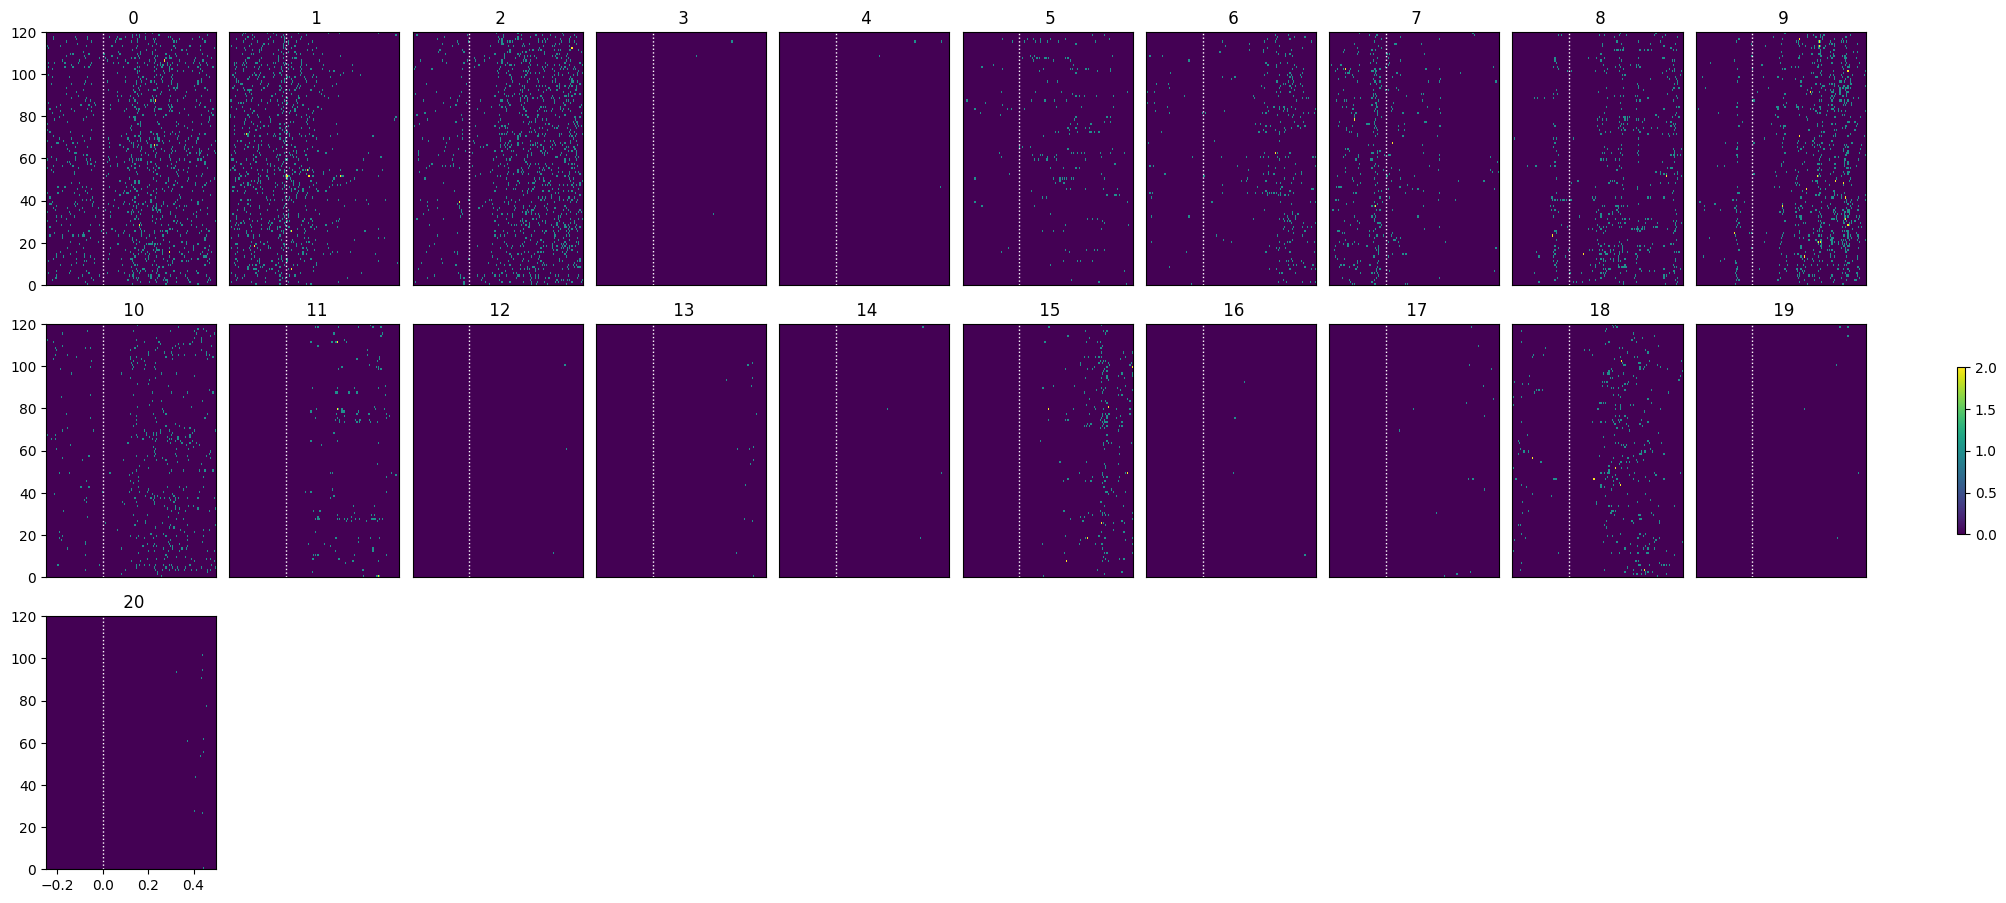

In [64]:
lo_selected_idxs = select_cells(spike_matrix, stimulus_onset_idx)
show_many_responses(spike_matrix[lo_selected_idxs], 5, 10)